# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypo_amounts = {
    "amounts":[1.2,5.3]
}

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
BTC_response_data=requests.get(btc_url)
BTC_data=BTC_response_data.json()
BTC_price=float(BTC_data["data"]["1"]['quotes']["USD"]['price'])
# Fetch current ETH price
ETH_response_data=requests.get(eth_url)
ETH_data=ETH_response_data.json()
ETH_price=float(ETH_data["data"]["1027"]['quotes']["USD"]['price'])
# Compute current value of my crpto
my_btc=crypo_amounts["amounts"][0]
my_eth=crypo_amounts["amounts"][1]
my_btc_value = my_btc * BTC_price
my_eth_value = my_eth * ETH_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38068.80
The current value of your 5.3 ETH is $7132.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy =50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
start_day= pd.Timestamp("2020-01-22",tz="America/New_York").isoformat()
end_day= pd.Timestamp('2020-01-22',tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
spy_agg_df= alpaca.get_barset(
    tickers,
    timeframe,
    start = start_day,
    end = end_day
).df

# Using a for loop to just get the closing price in a dataframe
spy_agg_close_df=pd.DataFrame()
for ticker in tickers:
    spy_agg_close_df[ticker]=spy_agg_df[ticker]['close']
    
# Set the date as an index
spy_agg_close_df.index=spy_agg_close_df.index.date
# Preview DataFrame
spy_agg_close_df.head()

,AGG,SPY
2020-01-22,113.44,331.39


In [9]:
# Pick AGG and SPY close prices
agg_close_price = spy_agg_close_df['AGG'][0]
spy_close_price = spy_agg_close_df['SPY'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.44
Current SPY closing price: $331.39


In [10]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16569.50
The current value of your 200 AGG shares is $22688.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income=12000

# Create savings DataFrame
savings_data = {
    "amount":[(my_btc_value + my_eth_value),(my_agg_value+my_spy_value)]
}
securities= ["crypto","shares"]
df_savings = pd.DataFrame(savings_data,index=securities)

# Display savings DataFrame
display(df_savings)

,amount
crypto,45201.381
shares,39257.500


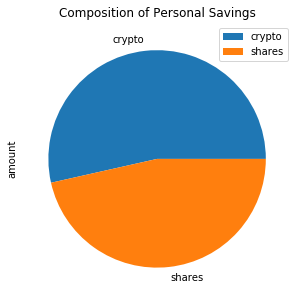

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount",title="Composition of Personal Savings",figsize=(5,5))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = (my_btc_value+my_eth_value)+(my_agg_value+my_spy_value)

# Validate saving health
if current_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif current_savings == emergency_fund:
    print("Congratulations! For reaching your financial goal.")
else:
    print(f"You need ${emergency_fund - current_savings} to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-24', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
spy_agg_5_df= alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
spy_agg_5_df.head()

AGG                                         \
                             open      high       low   close     volume   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148.0   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566.0   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827.0   

                              SPY                                     
                             open    high     low   close     volume  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268  
2016-01-29 00:00:00-05:00  190.02  193.75  189.88  193.69  145410523

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear=MCSimulation(
    portfolio_data=spy_agg_5_df,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30,
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data

AGG                                         \
                             open      high       low   close     volume   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148.0   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566.0   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827.0   
...                           ...       ...       ...     ...        ...   
2021-01-15 00:00:00-05:00  117.34  117.3600  117.1800  117.26  4776104.0   
2021-01-19 00:00:00-05:00  117.27  117.4200  117.2200  117.41  5057257.0   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.3100  117.40  3877734.0   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.1400  117.26  5801029.0   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.1900  117.26  3469745.0   

                                           SPY                             \
                          daily_return    open      high      low   close   
2016-01-25 00:00:00-05:00          NaN  189.93  190.1500  187.410  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.5300  188.020  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.5600  187.060  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.2000  187.160  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.7500  189.880  193.69   
...                                ...     ...       ...      ...     ...   
2021-01-15 00:00:00-05:00     0.000939  376.72  377.5800  373.700  375.68   
2021-01-19 00:00:00-05:00     0.001279  378.34  379.2300  376.750  378.63   
2021-01-20 00:00:00-05:00    -0.000085  381.11  384.7900  380.690  383.86   
2021-01-21 00:00:00-05:00    -0.001193  384.49  384.9500  383.250  384.20   
2021-01-22 00:00:00-05:00     0.000000  382.25  384.1256  381.835  382.86   

                                                   
                              volume daily_return  
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056  
...                              ...          ...  
2021-01-15 00:00:00-05:00   78405054    -0.007319  
2021-01-19 00:00:00-05:00   42257108     0.007852  
2021-01-20 00:00:00-05:00   53064901     0.013813  
2021-01-21 00:00:00-05:00   41800991     0.000886  
2021-01-22 00:00:00-05:00   39108239    -0.003488  

[1259 rows x 12 columns]

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994229,0.994951,1.002060,1.000934,0.984732,0.996330,1.001229,0.986116,1.007196,1.012304,...,1.010500,0.999119,0.998121,0.995587,1.009383,0.995253,0.995310,0.998800,1.013136,1.000556
2,0.999724,1.000088,0.988856,0.997456,0.980961,0.999648,0.996026,0.991504,1.001103,1.014680,...,1.006023,1.004122,0.991949,1.004260,1.007612,1.000665,0.980935,1.006541,1.022103,0.999966
3,1.000161,1.005191,1.012103,0.991811,0.972529,0.995368,1.007262,0.995171,1.007448,1.008593,...,1.002364,1.009439,0.993992,1.000169,1.019347,0.997911,0.976928,1.023106,1.036476,1.004390
4,1.014900,0.995724,1.026212,0.997509,0.959396,1.008722,1.011017,0.991285,1.010052,1.007492,...,1.002907,0.987691,0.999796,1.007409,1.022385,0.992381,0.980085,1.014572,1.034737,0.999408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.600145,7.064503,9.978649,5.995160,7.785631,9.677310,29.210438,24.500784,29.920714,12.032128,...,13.407777,20.586126,12.741910,12.021827,61.195716,76.389203,15.249073,15.954782,16.735928,43.944019
7557,16.623792,7.006994,10.138416,5.961278,7.844288,9.654534,29.123417,24.529946,29.617349,11.934310,...,13.113020,20.574825,12.612437,12.101365,60.972320,77.133288,15.221240,16.067376,16.877143,44.041824
7558,16.901812,7.013668,10.160920,6.000400,7.889642,9.653573,29.093742,24.469779,30.102495,11.965933,...,13.160755,20.693210,12.416632,12.105076,61.304951,77.282380,15.284596,16.028561,17.133328,44.200162
7559,16.791996,6.950202,10.091908,5.978112,7.821700,9.681506,29.051641,24.772152,30.173623,11.868787,...,13.258762,20.725552,12.339792,12.125791,59.948754,77.220633,15.332866,16.100549,17.088060,43.688921


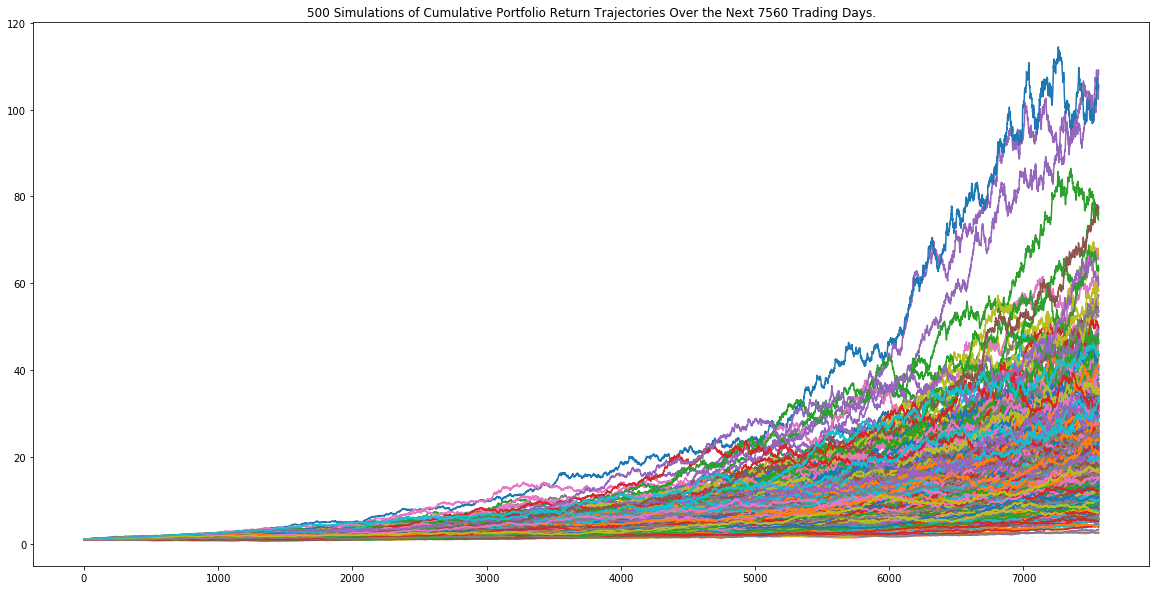

In [19]:
# Plot simulation outcomes
thirtyyear_lineplot=MC_thirtyyear.plot_simulation()

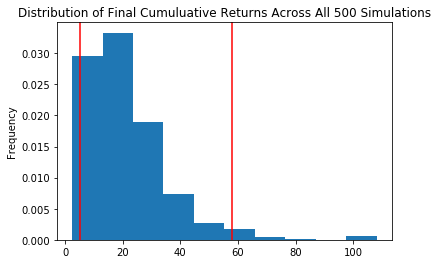

In [20]:
# Plot probability distribution and confidence intervals
thirtyyear_dist=MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
thirtyyear_tbl=MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(thirtyyear_tbl)

count           500.000000
mean             21.278439
std              14.303536
min               2.453202
25%              11.405324
50%              17.448981
75%              27.124032
max             108.098235
95% CI Lower      5.170341
95% CI Upper     57.802371
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(thirtyyear_tbl[8]*initial_investment,2)
ci_upper=round(thirtyyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $103406.81 and $1156047.43


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(thirtyyear_tbl[8]*initial_investment,2)
ci_upper=round(thirtyyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $155110.22 and $1734071.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear=MCSimulation(
    portfolio_data=spy_agg_5_df,
    weights=[.01,.99],
    num_simulation=500,
    num_trading_days=252*5,
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003520,1.008648,0.997554,1.023539,1.013850,0.998419,0.995330,0.999141,1.017352,1.029236,...,1.007305,1.007302,1.005676,1.010564,0.998550,1.010340,1.024897,0.996367,1.003062,0.997094
2,1.007895,1.020358,0.996323,1.031106,1.018117,1.015560,1.016412,0.989855,1.021211,1.009587,...,0.987031,1.014921,1.013560,1.003184,1.006628,1.008837,1.019550,0.988422,1.001151,1.000789
3,1.018136,1.043610,1.013622,1.025289,1.030747,1.020316,1.027604,0.986867,1.033601,1.011328,...,0.986239,1.024023,1.010123,0.995947,0.998924,1.035832,1.001957,0.997181,1.025495,1.024168
4,1.037040,1.044825,1.031880,1.035418,1.017889,1.016680,1.042441,1.009258,1.049922,1.033788,...,0.996151,1.018210,1.017373,0.978761,1.001437,1.032945,0.993036,1.005953,1.008892,1.027503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.455408,1.381259,2.236838,1.116626,1.093745,2.466281,3.901660,1.159544,1.091746,1.899212,...,1.427640,3.238130,2.548177,2.069231,2.828748,0.903892,2.870776,0.968281,3.342331,1.628329
1257,1.456274,1.376411,2.199154,1.110474,1.079425,2.528571,3.884701,1.164512,1.093735,1.912904,...,1.452476,3.192363,2.569629,2.061117,2.777711,0.895621,2.844691,0.953857,3.327109,1.638556
1258,1.490655,1.376960,2.223992,1.100017,1.098740,2.514575,3.847393,1.160578,1.092331,1.904519,...,1.492707,3.191430,2.608694,2.067900,2.763733,0.896324,2.834113,0.964901,3.331601,1.643579
1259,1.495630,1.406303,2.204741,1.108383,1.104866,2.579256,3.763412,1.158761,1.110257,1.916838,...,1.512200,3.255209,2.555809,2.074258,2.769816,0.901803,2.790801,0.967154,3.398257,1.621202


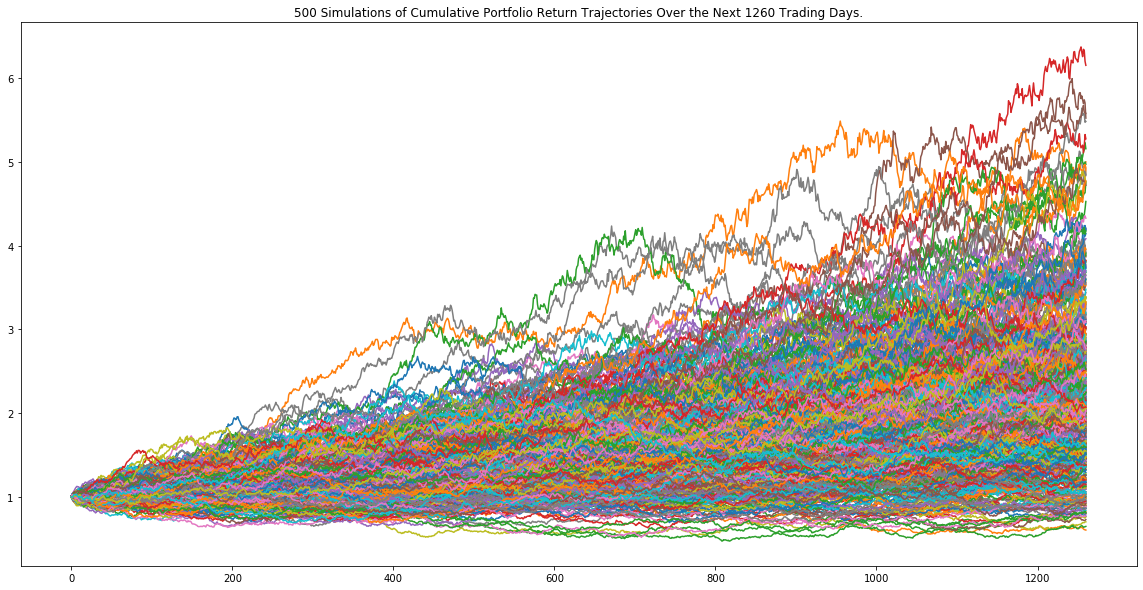

In [26]:
# Plot simulation outcomes
fiveyear_lineplot=MC_fiveyear.plot_simulation()
fiveyear_lineplot.get_figure().savefig("Images/MC_fiveyear_sim_plot.PNG",bbox_inches="tight")

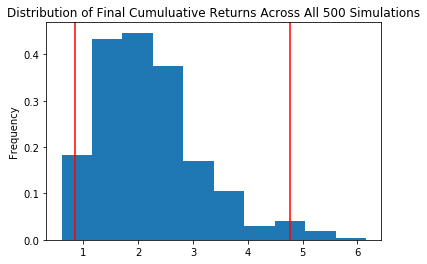

In [27]:
# Plot probability distribution and confidence intervals
fiveyear_dist=MC_fiveyear.plot_distribution()
fiveyear_dist.get_figure().savefig("Images/MC_fiveyear_plot_dist.PNG",bbox_inches="tight") 

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_tbl=MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(fiveyear_tbl)

count           500.000000
mean              2.203274
std               0.942815
min               0.602831
25%               1.547246
50%               2.034945
75%               2.672215
max               6.155825
95% CI Lower      0.848412
95% CI Upper      4.768434
Name: 1260, dtype: float64


In [38]:
# Set initial investment
initial_investment = 375000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(fiveyear_tbl[8]*initial_investment,2)
ci_upper_five=round(fiveyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $375000 in the portfolio over the next 5 years will end within in the range of $318154.6 and $1788162.6


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear=MCSimulation(
    portfolio_data=spy_agg_5_df,
    weights=[.01,.99],
    num_simulation=500,
    num_trading_days=252*10,
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.971826,0.991054,0.992787,0.977752,0.980566,1.016108,1.003697,0.995489,1.003884,0.987988,...,1.004245,0.998554,0.990740,1.022731,1.018667,0.972480,0.997665,0.999526,0.987859,0.992527
2,0.989535,0.991501,1.008512,0.993068,0.980912,1.008242,1.017425,0.989801,1.015557,1.001822,...,1.010337,0.981530,1.003386,1.048137,1.025317,0.994911,0.989892,1.002128,1.003412,1.003615
3,0.984705,1.007016,1.000494,0.976812,0.954112,0.996052,1.027713,0.994727,1.023287,1.017081,...,1.008975,0.981683,1.009291,1.053739,1.027432,1.001663,0.987197,1.008048,0.988244,1.021976
4,1.001384,1.015046,0.998194,0.981581,0.955314,0.973905,1.024137,0.986666,1.019226,1.005574,...,0.996141,0.970842,0.994123,1.043131,1.035920,1.020347,1.002113,1.012408,0.996307,1.017127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.800289,2.504393,1.045547,28.132930,10.096801,1.953530,11.748642,9.347596,2.418653,3.107099,...,5.287049,3.703267,3.587493,5.143472,3.883703,3.742376,6.353810,8.152177,7.092290,6.673334
2517,4.806527,2.494036,1.044159,28.184630,10.029561,1.929496,11.603264,9.378712,2.388391,3.065248,...,5.215737,3.681999,3.593771,5.168362,3.924002,3.788294,6.329744,7.920491,7.185828,6.761000
2518,4.889935,2.462503,1.047752,28.296160,9.971085,1.909610,11.349547,9.580303,2.398399,3.121451,...,5.258603,3.693337,3.696895,5.130092,3.999602,3.791882,6.219484,8.088227,7.220215,6.707268
2519,4.901856,2.445336,1.037458,27.964315,10.143219,1.937745,11.467427,9.727882,2.383347,3.143336,...,5.290646,3.721555,3.722825,5.131368,4.048622,3.792371,6.343799,7.962071,7.104194,6.652174


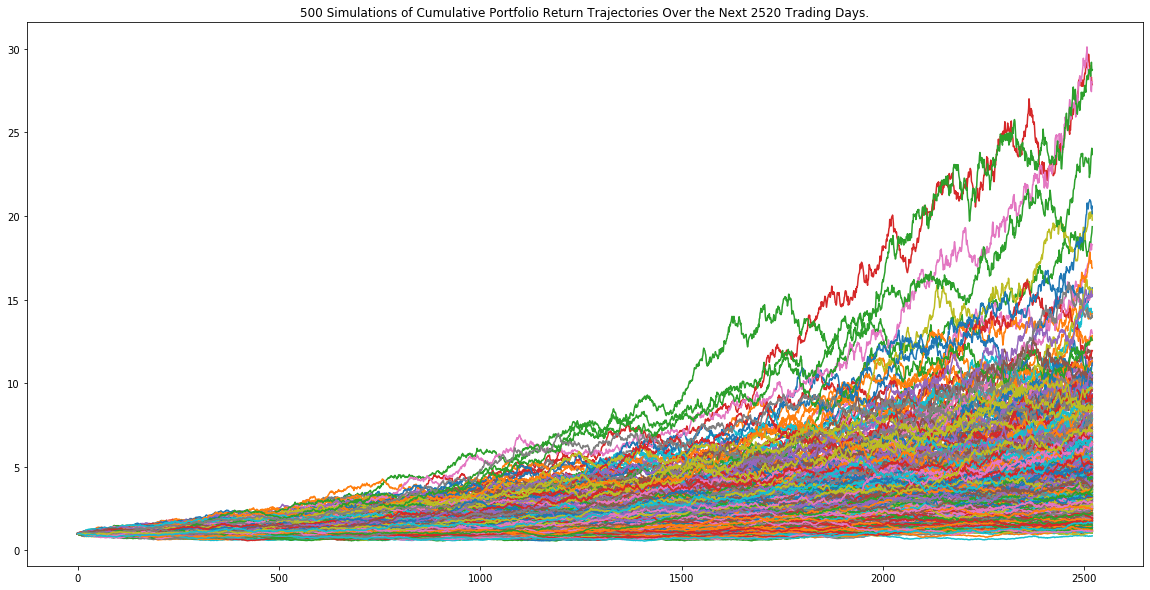

In [32]:
# Plot simulation outcomes
tenyear_lineplot=MC_tenyear.plot_simulation()
tenyear_lineplot.get_figure().savefig("Images/MC_tenyear_sim_plot.PNG",bbox_inches="tight")

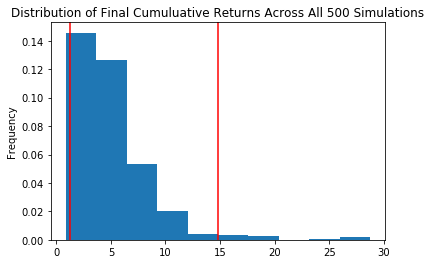

In [33]:
# Plot probability distribution and confidence intervals
tenyear_dist=MC_tenyear.plot_distribution()
tenyear_dist.get_figure().savefig("Images/MC_tenyear_plot_dist.PNG",bbox_inches="tight") 

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_tbl=MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tenyear_tbl)

count           500.000000
mean              5.091315
std               3.665748
min               0.871414
25%               2.671584
50%               4.209534
75%               6.330113
max              28.740762
95% CI Lower      1.219184
95% CI Upper     14.786684
Name: 2520, dtype: float64


In [40]:
# Set initial investment
initial_investment = 121000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(tenyear_tbl[8]*initial_investment,2)
ci_upper_ten=round(tenyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $121000 in the portfolio over the next 10 years will end within in the range of $147521.23 and $1789188.77


##### While I recommend staying with the 30 year retirement plan sometimes life is to short to not enjoy. In order for your to reap the same benefits as a 30 year plan you would have to have an initial investment of approximately $ 375,000 USD  for a five year plan and approximately $121,500 USD for a ten year plan. You would also need a very agressive investment weight, 99% stocks, in order to acheive those returns.